In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-news-popularity-dataset/OnlineNewsPopularityReduced.csv


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr
sns.set_theme(palette=sns.color_palette("Set3"))

## Pre-processing

In [67]:
df = pd.read_csv('/kaggle/input/online-news-popularity-dataset/OnlineNewsPopularityReduced.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,4954.0,49.628381,22.589941,8.000000,30.000000,50.000000,68.000000,101.000000
n_tokens_title,4954.0,11.201857,2.182106,3.000000,10.000000,11.000000,13.000000,23.000000
n_tokens_content,4954.0,550.405733,457.900604,0.000000,256.000000,436.000000,753.750000,6159.000000
n_unique_tokens,4954.0,0.478429,0.180073,0.000000,0.445631,0.515556,0.579986,1.000000
n_non_stop_words,4954.0,0.901494,0.298028,0.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,4954.0,0.616601,0.220690,0.000000,0.608315,0.671141,0.731024,1.000000
num_hrefs,4954.0,10.355874,12.529856,0.000000,3.000000,7.000000,13.000000,304.000000
num_self_hrefs,4954.0,2.677634,3.402775,0.000000,1.000000,2.000000,3.000000,65.000000
num_imgs,4954.0,3.572467,5.979075,0.000000,1.000000,1.000000,3.000000,77.000000
num_videos,4954.0,1.172184,3.766454,0.000000,0.000000,0.000000,1.000000,50.000000


[About dataset](https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set/data)

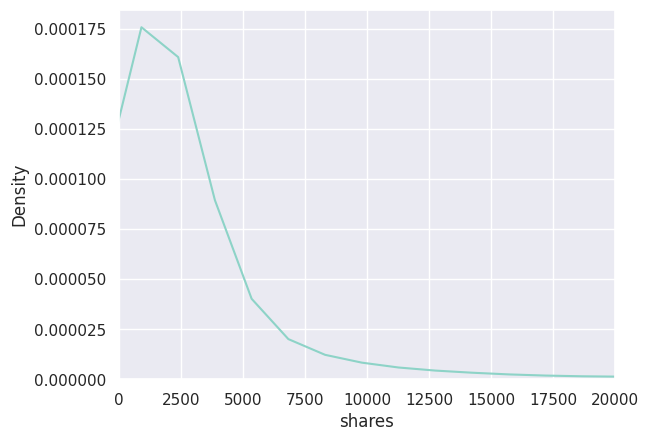

In [68]:
sns.kdeplot(df["shares"])
plt.xlim([0, 20000])
plt.show()

Drop useless columns. We should also drop non-predictive feature to avoid overfitting.

In [69]:
df.drop(labels=['url', 'kw_min_min','timedelta'], axis = 1, inplace=True)
df.dropna()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,332,0.528481,1.0,0.645833,6,3,1,1,4.427711,...,0.100000,0.70,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121,8600
1,10,393,0.518817,1.0,0.596899,14,1,1,0,5.066158,...,0.250000,0.80,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000,23700
2,13,1643,0.388854,1.0,0.546967,29,4,7,0,4.944614,...,0.033333,0.80,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,8400
3,9,272,0.488889,1.0,0.512690,2,2,11,0,4.974265,...,0.100000,1.00,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000,4800
4,12,0,0.000000,0.0,0.000000,0,0,0,1,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560,3100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,11,346,0.529052,1.0,0.684783,9,7,1,1,4.523121,...,0.100000,0.75,-0.260000,-0.500000,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
4950,12,328,0.696296,1.0,0.885057,9,7,3,48,4.405488,...,0.136364,0.70,-0.211111,-0.400000,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
4951,10,442,0.516355,1.0,0.644128,24,1,12,1,5.076923,...,0.136364,0.50,-0.356439,-0.800000,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
4952,6,682,0.539493,1.0,0.692661,10,1,1,0,4.975073,...,0.062500,0.50,-0.205246,-0.500000,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Let's look at regression and classification. In conclusion we will find wich model is better. For the classification task, we will divide popularity into 3 groups:
* "Poor" -- <=2500
* "Good" -- >2500 <= 10000
* "Exelent" -- >10000

In [70]:
df_regression = df.copy()
df_classification = df.copy()

<Axes: >

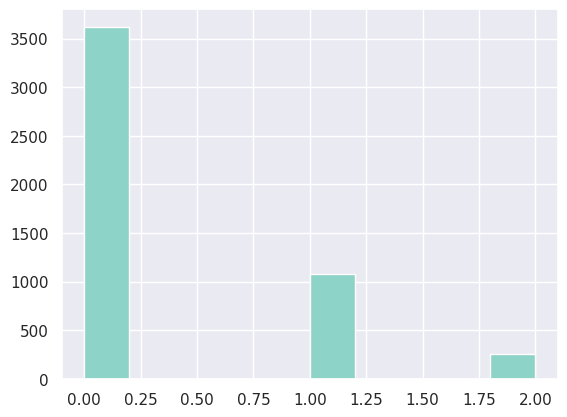

In [71]:
def mapping(x):
    if x <= 2500:
        return 0
    elif 2500 < x <= 10000:
        return 1
    elif x>10000:
        return 2

df_classification['shares'] = df_classification['shares'].map(mapping) 
df_classification['shares'].plot(kind="bar")

## Building DecisionTree model

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

X = df_classification.drop('shares', axis=1)
y = df_classification['shares']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=4)
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_valid)
print('accuracy_score:', accuracy_score(y_valid, y_pred))

accuracy_score: 0.612590799031477


In [73]:
from sklearn.tree import DecisionTreeRegressor
y_reg = df_regression['shares']
X_train_reg, X_valid_reg, y_train_reg, y_valid_reg = train_test_split(X, y_reg, test_size=0.25, random_state=4)
tree_reg = DecisionTreeRegressor(random_state = 10)
tree_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = tree_reg.predict(X_valid_reg)
print('r2_score:', r2_score(y_valid_reg, y_pred_reg))
print('RMSE:', np.sqrt(mean_squared_error(y_valid_reg, y_pred_reg)))

r2_score: -1.6327213274792824
RMSE: 13545.646747345589


We can try taking the logarithm of the target variable to make normal distribution. Maybe it will improve our r2_score, because negative value show us that model can be mutch better.

In [74]:
df_regression["shares"] = np.log(df_regression["shares"])
y_reg = df_regression['shares']
X_train_reg, X_valid_reg, y_train_reg, y_valid_reg = train_test_split(X, y_reg, test_size=0.25, random_state=4)
tree_reg = DecisionTreeRegressor(random_state = 10)
tree_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = tree_reg.predict(X_valid_reg)
print('r2_score:', r2_score(y_valid_reg, y_pred_reg))
print('RMSE:', np.sqrt(mean_squared_error(y_valid_reg, y_pred_reg)))

r2_score: -0.7541401438582855
RMSE: 1.2370205416170288


In [75]:
print(f"Regression max_depth: {tree_reg.tree_.max_depth}\nClassification: {tree.tree_.max_depth}")

Regression max_depth: 33
Classification: 25


In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kf = KFold(n_splits=5, shuffle=True, random_state=42)

tree_reg = DecisionTreeRegressor(random_state=10)
scores_reg = cross_val_score(tree_reg, X, y_reg, cv=kf, scoring='neg_root_mean_squared_error')

tree_clas = DecisionTreeClassifier(random_state=10)
scores_clas = cross_val_score(tree_clas, X, y, cv=kf, scoring='accuracy')

print('array of neg_root_mean_squared_error for each fold:', scores_reg)
print(' the mean neg_root_mean_squared_error across all folds:', np.mean(scores_reg))

print('\n\narray of accuracy_score for each fold:', scores_clas)
print(' the mean accuracy_score across all folds:', np.mean(scores_clas))

array of neg_root_mean_squared_error for each fold: [-1.21943348 -1.23008057 -1.25427794 -1.26979275 -1.27316088]
 the mean neg_root_mean_squared_error across all folds: -1.2493491237128596


array of accuracy_score for each fold: [0.61150353 0.61957619 0.60948537 0.61251261 0.62020202]
 the mean accuracy_score across all folds: 0.6146559438991327


We have a better model but far from "best". Classification task looks more indicative.

## Finding best parametrs

In [77]:
from sklearn.model_selection import GridSearchCV

tree_reg = DecisionTreeRegressor(random_state=10)
tree_clas = DecisionTreeClassifier(random_state=10)

parametrs = {'splitter': ['best', 'random'],
                                'max_depth': np.arange(2, 7),
                                'min_samples_split': np.arange(2, 7),
                                'max_features': np.arange(5, 30),
                                'min_samples_leaf': np.arange(1, 7)}

reg_grid = GridSearchCV(tree_reg, parametrs, cv=5, scoring='neg_root_mean_squared_error',n_jobs=-1)
class_grid = GridSearchCV(tree_clas, parametrs, cv=5, scoring='accuracy',n_jobs=-1)

reg_grid.fit(X_train_reg, y_train_reg)
class_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
                         'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4, 5, 6]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [78]:
print(f"For regression: {reg_grid.best_params_} RMSE: {reg_grid.best_score_}")
print(f"For classification: {class_grid.best_params_} accuracy: {class_grid.best_score_}")

For regression: {'max_depth': 4, 'max_features': 24, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'} RMSE: -0.8679023817658965
For classification: {'max_depth': 3, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'} accuracy: 0.7337819650067294


In [79]:
best_tree_reg = reg_grid.best_estimator_
y_pred_reg = best_tree_reg.predict(X_valid_reg)
print(f"R2_score: {r2_score(y_valid_reg, y_pred_reg)}\nRMSE: { np.sqrt(mean_squared_error(y_valid_reg, y_pred_reg))}")

R2_score: 0.050488416424631866
RMSE: 0.9101121270964643


In [80]:
best_tree_clas = class_grid.best_estimator_
y_pred = best_tree_clas.predict(X_valid)
print('accuracy_score:', accuracy_score(y_valid, y_pred))

accuracy_score: 0.7312348668280871


In [81]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, X, y, param_name, param_range, cv=5, scoring='accuracy'):
    """
    Plot a validation curve for a given estimator, hyperparameter, and range of values.

    Parameters:
        estimator (object): The estimator to evaluate.
        X (array-like): Feature matrix.
        y (array-like): Target variable.
        param_name (str): Name of the hyperparameter to explore.
        param_range (array-like): Values to test for the hyperparameter.
        cv (int): Number of cross-validation folds.
        scoring (str): Scoring metric (e.g., 'accuracy').

    Returns:
        None: Displays the validation curve plot.
    """
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

Visualize validation curves for different hyperparameters and ranges for DecisionTreeClassifier

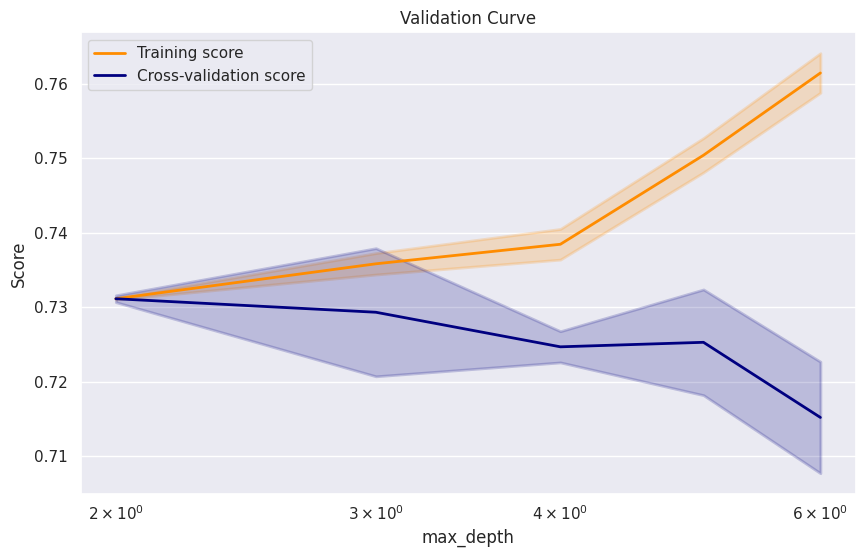

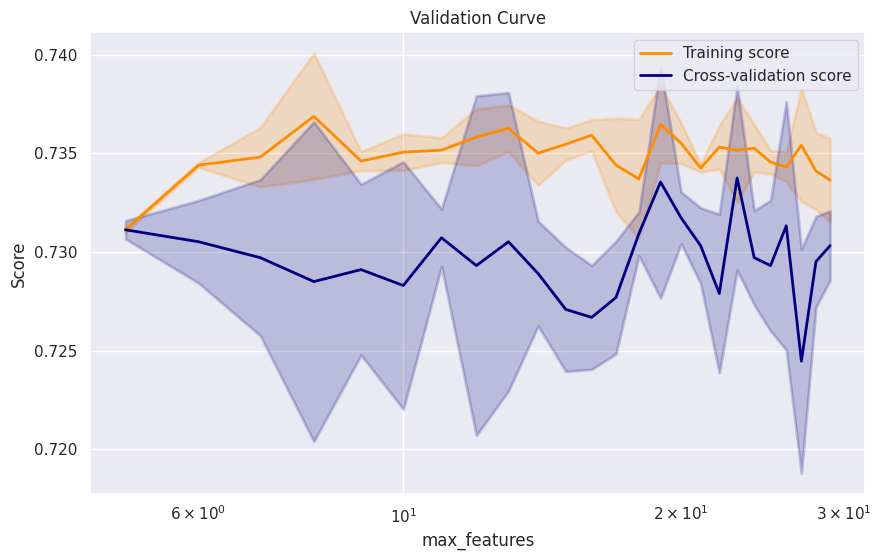

In [82]:
plot_validation_curve(best_tree_clas, X, y, 'max_depth', np.arange(2, 7))
plot_validation_curve(best_tree_clas, X, y, 'max_features', np.arange(5, 30))

Visualize validation curves for different hyperparameters and ranges for DecisionTreeRegressor

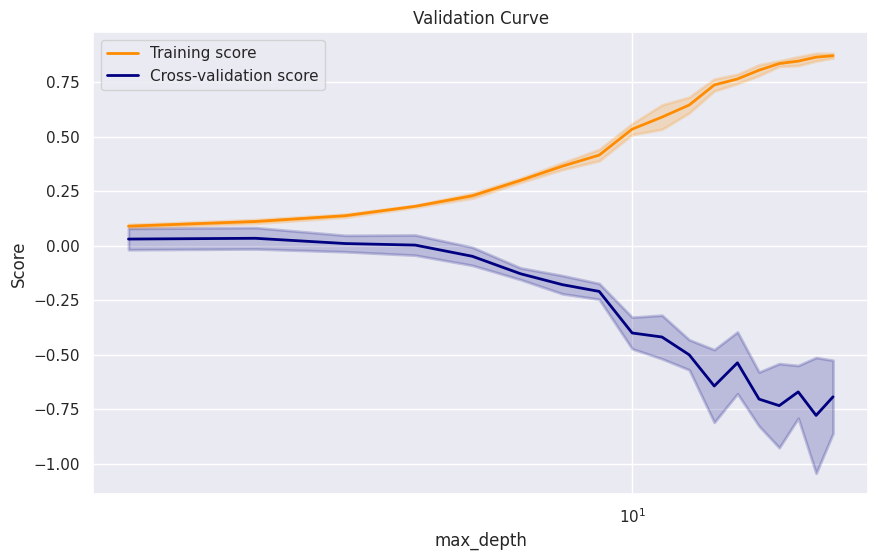

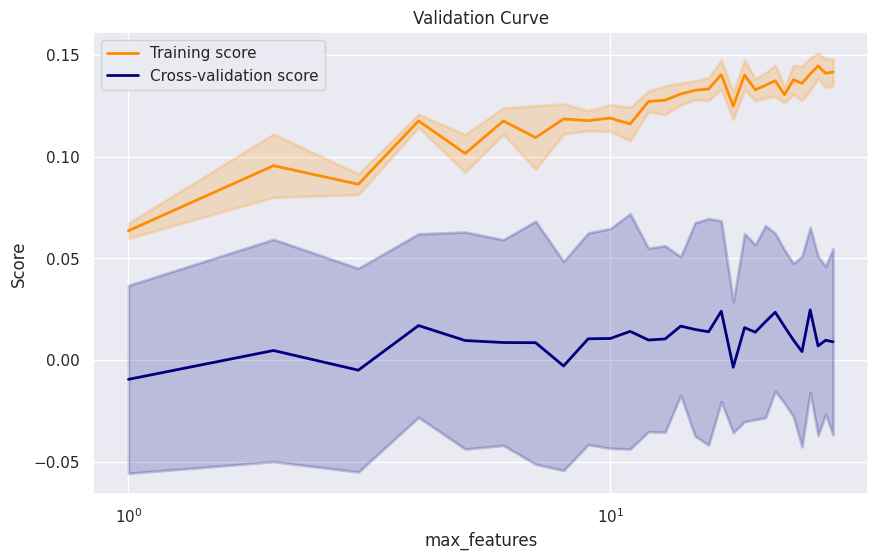

In [83]:
plot_validation_curve(best_tree_reg, X, y, 'max_depth', np.arange(2, 20), scoring = 'r2')
plot_validation_curve(best_tree_reg, X, y, 'max_features', np.arange(1, 30),scoring = 'r2')

Classification tree

In [84]:
from sklearn.tree import export_graphviz

export_graphviz(best_tree_clas, out_file='/kaggle/working/tree.dot', feature_names=X.columns)
print(open('tree.dot').read())

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="kw_min_avg <= 2176.298\ngini = 0.415\nsamples = 3715\nvalue = [2714, 818, 183]"] ;
1 [label="kw_avg_avg <= 3157.678\ngini = 0.362\nsamples = 2852\nvalue = [2209, 546, 97]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="kw_avg_avg <= 2490.71\ngini = 0.276\nsamples = 2071\nvalue = [1738, 290, 43]"] ;
1 -> 2 ;
3 [label="gini = 0.213\nsamples = 1015\nvalue = [894, 108, 13]"] ;
2 -> 3 ;
4 [label="gini = 0.331\nsamples = 1056\nvalue = [844, 182, 30]"] ;
2 -> 4 ;
5 [label="LDA_00 <= 0.875\ngini = 0.524\nsamples = 781\nvalue = [471, 256, 54]"] ;
1 -> 5 ;
6 [label="gini = 0.521\nsamples = 771\nvalue = [470, 247, 54]"] ;
5 -> 6 ;
7 [label="gini = 0.18\nsamples = 10\nvalue = [1, 9, 0]"] ;
5 -> 7 ;
8 [label="kw_max_min <= 2550.0\ngini = 0.548\nsamples = 863\nvalue = [505, 272, 86]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="kw_max_avg <= 8104

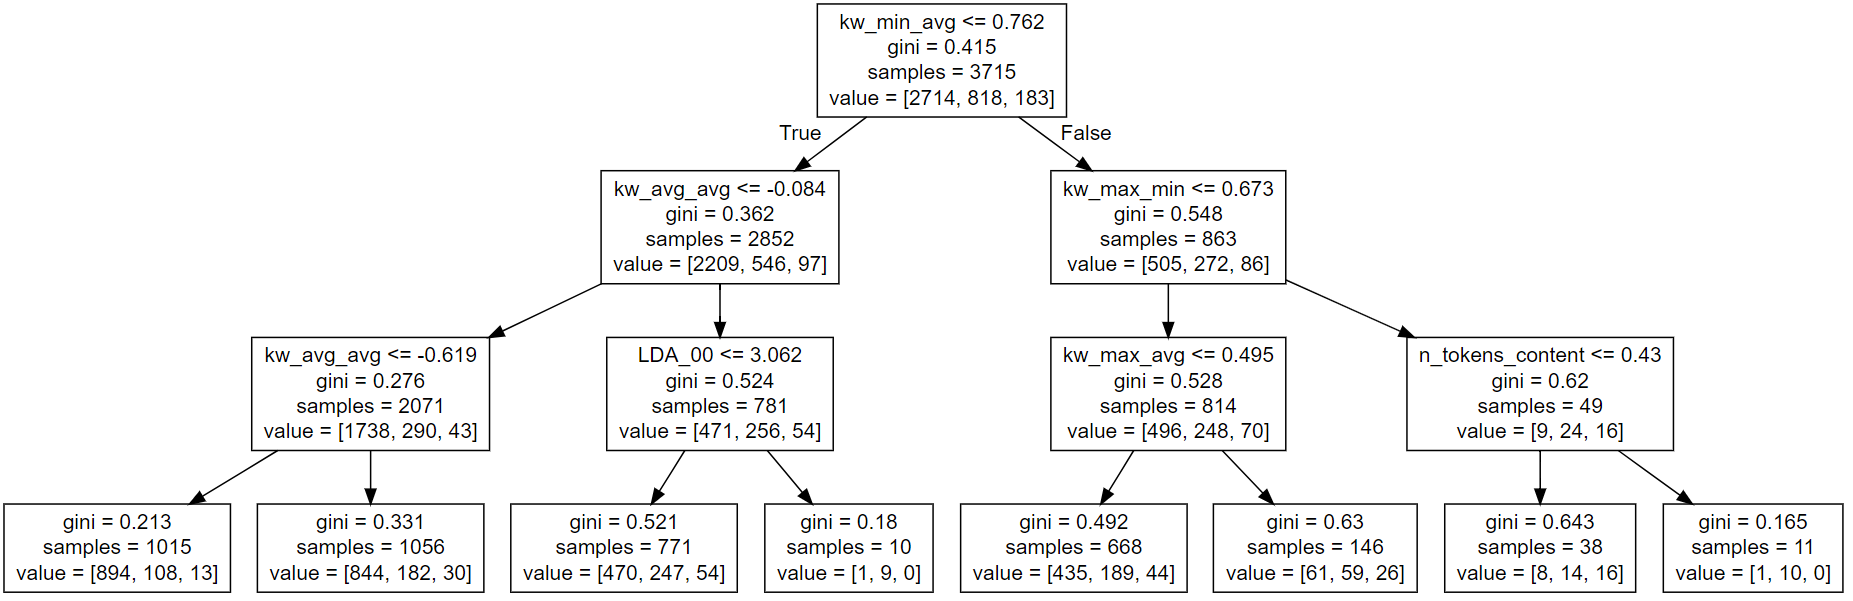

Regression tree

In [85]:
from sklearn.tree import export_graphviz

export_graphviz(best_tree_reg, out_file='/kaggle/working/tree_reg.dot', feature_names=X.columns)
print(open('tree_reg.dot').read())

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="data_channel_is_world <= 0.5\nsquared_error = 0.844\nsamples = 3715\nvalue = 7.467"] ;
1 [label="kw_avg_avg <= 3311.227\nsquared_error = 0.888\nsamples = 2521\nvalue = 7.597"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="self_reference_max_shares <= 3550.0\nsquared_error = 0.583\nsamples = 1236\nvalue = 7.349"] ;
1 -> 2 ;
3 [label="data_channel_is_tech <= 0.5\nsquared_error = 0.52\nsamples = 741\nvalue = 7.227"] ;
2 -> 3 ;
4 [label="squared_error = 0.507\nsamples = 534\nvalue = 7.12"] ;
3 -> 4 ;
5 [label="squared_error = 0.447\nsamples = 207\nvalue = 7.504"] ;
3 -> 5 ;
6 [label="kw_min_max <= 745.0\nsquared_error = 0.622\nsamples = 495\nvalue = 7.531"] ;
2 -> 6 ;
7 [label="squared_error = 0.729\nsamples = 219\nvalue = 7.718"] ;
6 -> 7 ;
8 [label="squared_error = 0.487\nsamples = 276\nvalue = 7.383"] ;
6 -> 8 ;
9 [label="kw_max_min <= 1950.0\nsquared_error = 1.065

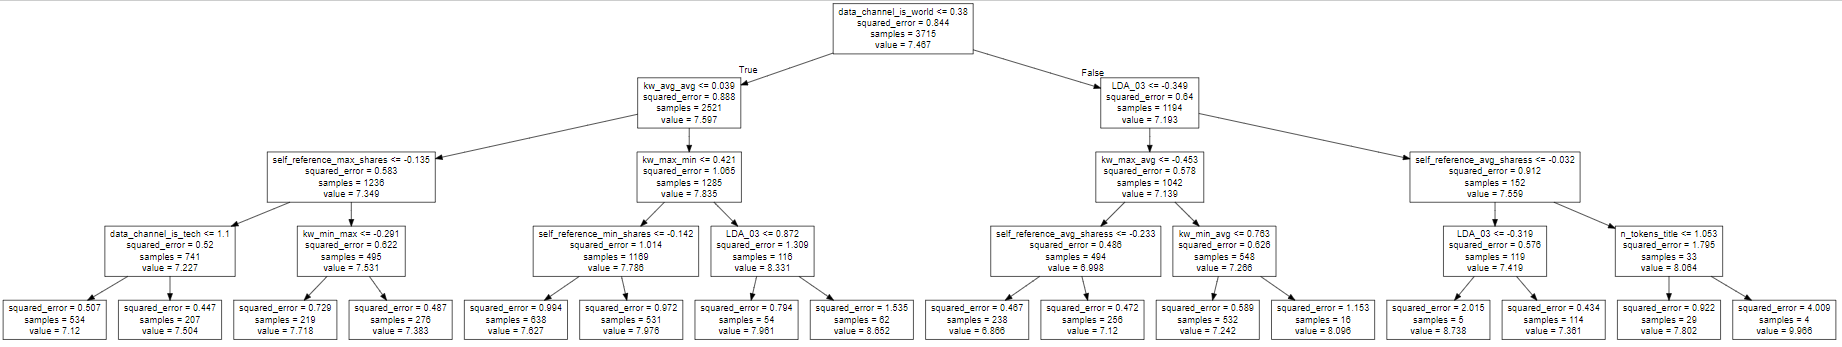

Let's look at features importances

For classification

<Axes: xlabel='feature'>

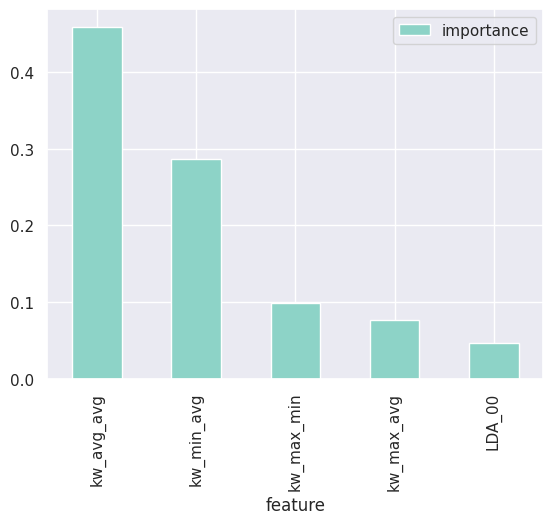

In [86]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(best_tree_clas.feature_importances_, 3)}).sort_values('importance', ascending=False)
feature_importances = feature_importances.set_index('feature')
feature_importances.head(5).plot(kind="bar")

For regression

<Axes: xlabel='feature'>

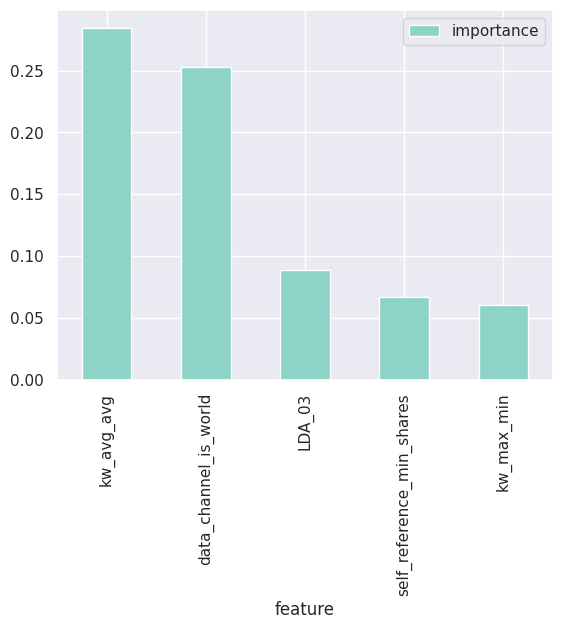

In [87]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(best_tree_reg.feature_importances_, 3)}).sort_values('importance', ascending=False)
feature_importances = feature_importances.set_index('feature')
feature_importances.head(5).plot(kind="bar")

## Building RandomForest model

In [88]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

rf_1 = RandomForestRegressor(random_state=10)
rf_1.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_1.predict(X_valid_reg)
print(f"R2_score: {r2_score(y_valid_reg, y_pred_reg)}\nRMSE: { np.sqrt(mean_squared_error(y_valid_reg, y_pred_reg))}")

R2_score: 0.10765073215422827
RMSE: 0.8822917198962185


In [89]:
rf_2 = RandomForestClassifier(random_state=10)
rf_2.fit(X_train,y_train)

y_pred = rf_2.predict(X_valid)
print('accuracy_score:', accuracy_score(y_valid, y_pred))

accuracy_score: 0.7376916868442293


We have better results without tuning. Let's find best parameters for regression

In [90]:
from sklearn.model_selection import RandomizedSearchCV
rf_reg = RandomForestRegressor(random_state=10)
params = {'n_estimators': np.arange(50, 701, 50),
                                       'max_depth': np.arange(5, 20),
                                       'max_features': np.arange(5, 30),
                                       'min_samples_leaf': np.arange(1, 7),
                                       'min_samples_split': np.arange(2, 11)}
rf_grid = RandomizedSearchCV(rf_reg, params,cv=5, scoring='neg_root_mean_squared_error',n_jobs=-1, random_state=4)
rf_grid.fit(X_train_reg, y_train_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700])},
                   random_state=4, scoring='neg_root_mean_squared_error')

In [91]:
print(f"For regression: {rf_grid.best_params_} RMSE: {rf_grid.best_score_}")
res_rf_grid = pd.DataFrame(rf_grid.cv_results_)

For regression: {'n_estimators': 450, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 7, 'max_depth': 11} RMSE: -0.8333042328824302


So, best random forest model for regression is

In [92]:
best_rf_reg = rf_grid.best_estimator_
y_pred_reg = best_rf_reg.predict(X_valid_reg)
print(f"R2_score: {r2_score(y_valid_reg, y_pred_reg)}\nRMSE: { np.sqrt(mean_squared_error(y_valid_reg, y_pred_reg))}")

R2_score: 0.12725997587207072
RMSE: 0.8725437545994439


Visualize validation curves for different hyperparameters and ranges for RandomForestRegressor

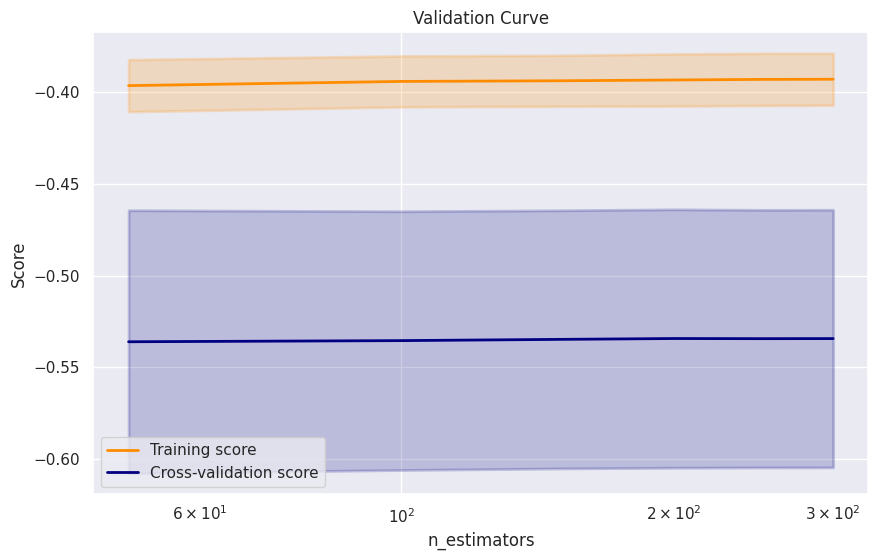

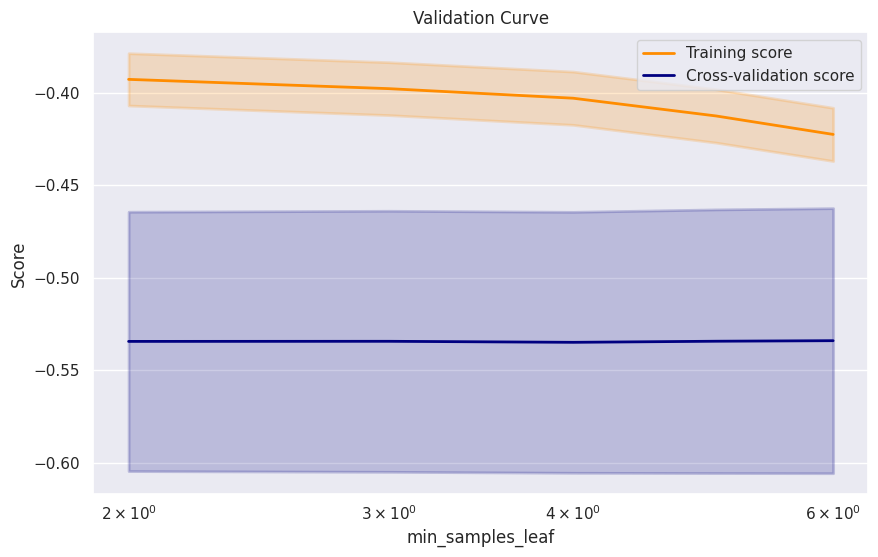

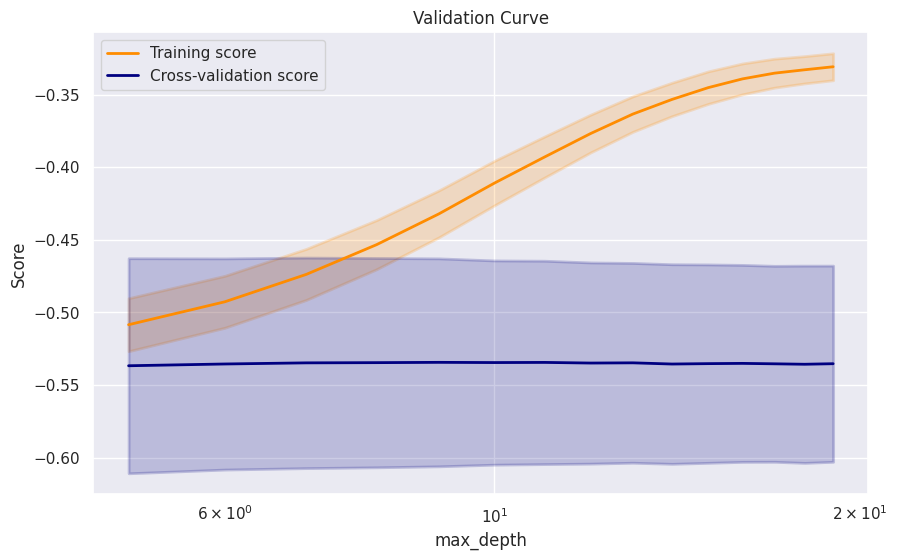

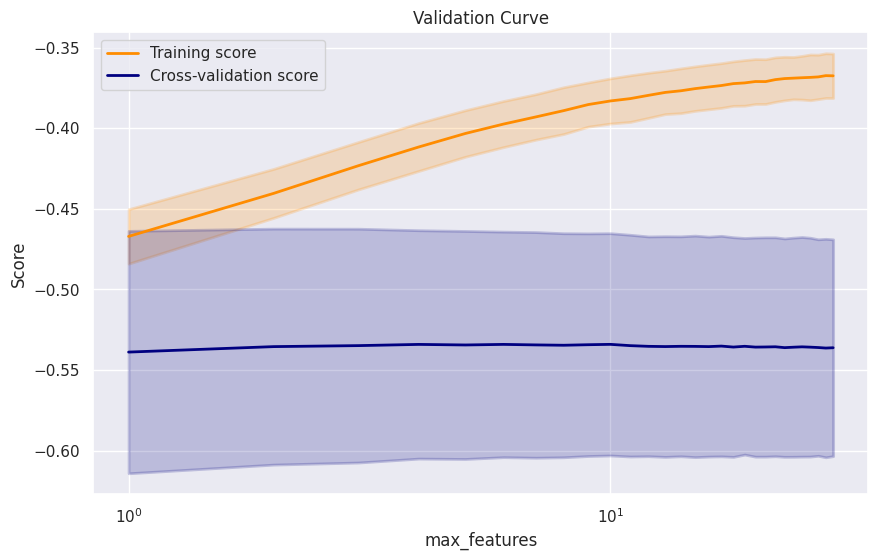

In [93]:
plot_validation_curve(best_rf_reg, X, y, 'n_estimators', np.arange(50, 301, 50), scoring = 'neg_root_mean_squared_error')
plot_validation_curve(best_rf_reg, X, y, 'min_samples_leaf', np.arange(2, 7),scoring = 'neg_root_mean_squared_error')
plot_validation_curve(best_rf_reg, X, y, 'max_depth', np.arange(5, 20), scoring = 'neg_root_mean_squared_error')
plot_validation_curve(best_rf_reg, X, y, 'max_features', np.arange(1, 30),scoring = 'neg_root_mean_squared_error')

Features importances:

<Axes: xlabel='feature'>

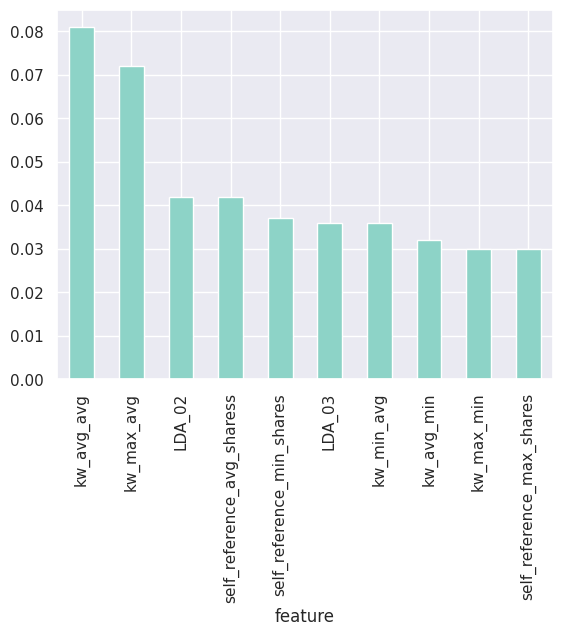

In [94]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(best_rf_reg.feature_importances_, 3)}).sort_values('importance', ascending=False)
feature_importances = feature_importances.set_index('feature')
feature_importances.head(10).plot(kind="bar", legend = False)

Let's find best parameters for classification model

In [95]:
rf_clas = RandomForestClassifier(random_state=10)
params = {'n_estimators': np.arange(50, 701, 50),
                                       'max_depth': np.arange(5, 20),
                                       'max_features': np.arange(5, 30),
                                       'min_samples_leaf': np.arange(2, 7),
                                       'min_samples_split': np.arange(2, 11)}
rf_clas_grid = RandomizedSearchCV(rf_clas, params,cv=5, scoring='accuracy',n_jobs=-1,random_state=4)
rf_clas_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700])},
                   random_state=4, scoring='accuracy')

In [96]:
print(f"For classification: {rf_clas_grid.best_params_} Accuracy: {rf_clas_grid.best_score_}")
res_rf_grid_clas = pd.DataFrame(rf_clas_grid.cv_results_)

For classification: {'n_estimators': 500, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 13, 'max_depth': 12} Accuracy: 0.7402422611036339


In [97]:
best_rf_clas = rf_clas_grid.best_estimator_
y_pred = best_rf_clas.predict(X_valid)
print('accuracy_score:', accuracy_score(y_valid, y_pred))

accuracy_score: 0.7393058918482648


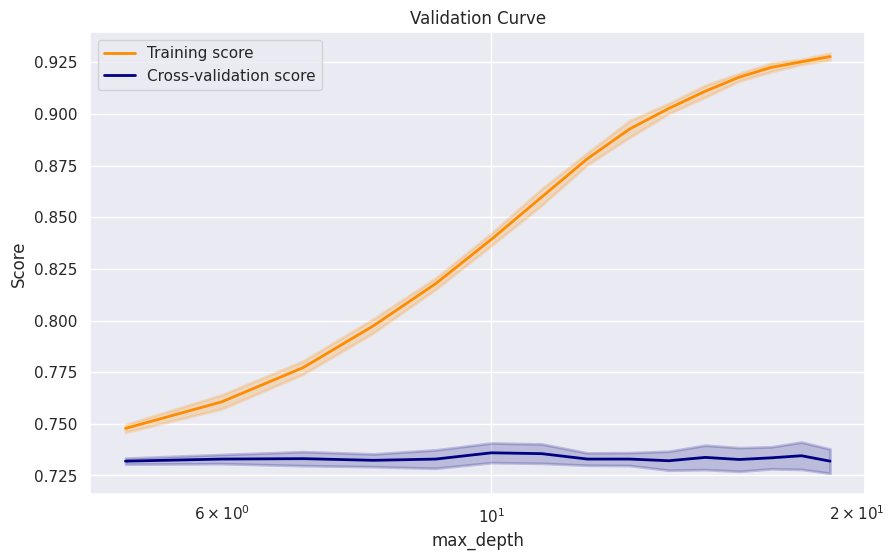

In [98]:
plot_validation_curve(best_rf_clas, X, y, 'max_depth', np.arange(5, 20), scoring = 'accuracy')

Features importances

<Axes: xlabel='feature'>

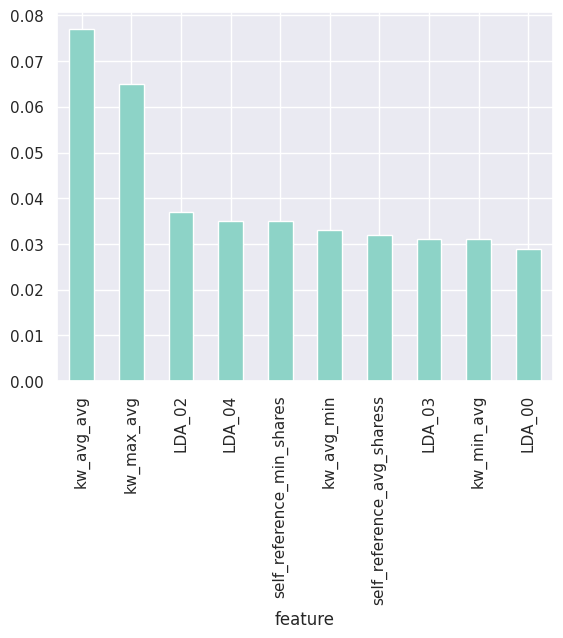

In [99]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(best_rf_clas.feature_importances_, 3)}).sort_values('importance', ascending=False)
feature_importances = feature_importances.set_index('feature')
feature_importances.head(10).plot(kind="bar", legend = False)

## Conclusion

Accuracy knn classifier model: 0.7485446087015339

Accuracy decision tree classifier model: 0.7364737550471064

Accuracy random forest classifier model: 0.7402422611036339

So, for classification task **knn model** show better result in cross validation. But we can't look at features importances in knn model

RMSE knn regressor model: 0.8766007810704105

RMSE decision tree regressor: 0.8622671014177576

RMSE random forest regressor: 0.8329743564501099

For regression task **random forest model** better result in cross validation.